In [4]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from dotenv import dotenv_values
from dotenv import load_dotenv
import sql_functions as sf
from sql_functions import get_sql_config, get_data, get_dataframe, get_engine

### 1. Star ratings


#### 1.1 Overview of star rating distribution 

In [3]:
#### create a df of business in PA from DB
schema = 'hh_analytics_23_3'
restaurants = sf.get_dataframe('SELECT * FROM hh_analytics_23_3.yelp_business_pa') 

In [4]:
# Group by stars 
ratings = restaurants.groupby(by='stars').count()
ratings = ratings.reset_index()
ratings = ratings[['stars', 'business_id']]

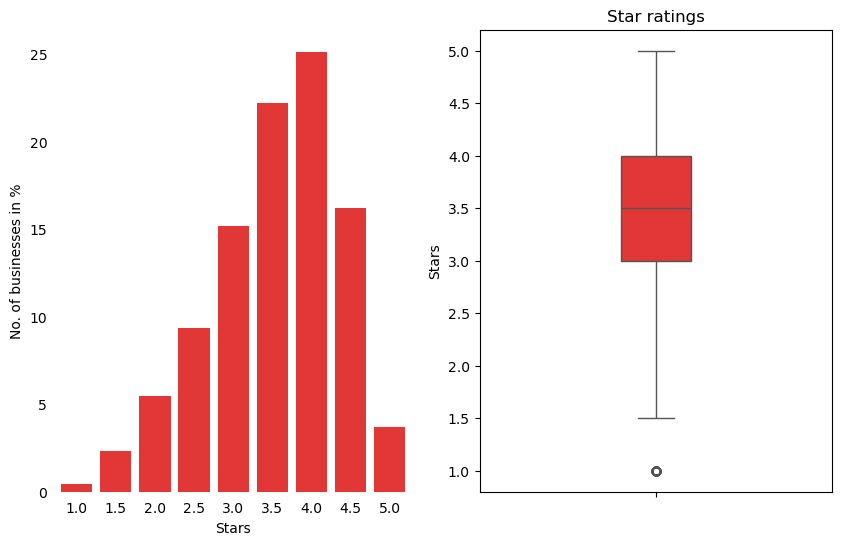

In [5]:
# Plot star rating distribution

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# fig.suptitle('Customer ratings', fontsize=16)
sns.barplot(ax = ax[0], x=ratings['stars'], y=ratings['business_id']*100/ratings['business_id'].sum(), color='#FF1A1A')
ax[0].set(xlabel='Stars', ylabel='No. of businesses in %')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(left = False)
ax[0].tick_params(bottom = False)
sns.boxplot(ax = ax[1], y=restaurants['stars'], width=0.2, color='#FF1A1A')
ax[1].set(ylabel='Stars')
ax[1].set_title('Star ratings');

#### 1.2 Co relation between attributes and star rating

In [11]:
restaurants = pd.read_csv('data/restaurants_pennsylvania.csv')

In [12]:
columns = []
stop_list = [
    'business_id',
    'name',
    'city',
    'state',
    'latitude',
    'longitude',
    'stars',
    'review_count',
    'categories',
    'monday',
    'tuesday',
    'wednesday',
    'thursday',
    'friday',
    'saturday',
    'sunday'
]

for column in restaurants.columns:
    if column not in stop_list:  
        columns.append(column)

columns

['accepts_credit_cards',
 'bike_parking',
 'price_range',
 'take_out',
 'delivery',
 'caters',
 'wi_fi',
 'outdoor_seating',
 'has_tv',
 'reservations',
 'alcohol',
 'good_for_kids',
 'parking',
 'attire',
 'table_service',
 'good_for_groups',
 'noise_level',
 'accepts_bitcoin',
 'parking_available']

In [13]:
for column in columns:
    restaurants[column].replace('True', 1, inplace=True)
    restaurants[column].replace('False', 0, inplace=True)
    restaurants[column].replace('nan', np.NaN, inplace=True)
    restaurants[column].replace('None', np.NaN, inplace=True)
    restaurants[column].replace('none', np.NaN, inplace=True)
    restaurants[column].replace('casual', 0, inplace=True)
    restaurants[column].replace('formal', 1, inplace=True)
    restaurants[column].replace('dressy', 2, inplace=True)
    restaurants[column].replace('full_bar', 0, inplace=True)
    restaurants[column].replace('beer_and_wine', 1, inplace=True)
    restaurants[column].replace('average', 0, inplace=True)
    restaurants[column].replace('quiet', 1, inplace=True)
    restaurants[column].replace('loud', 2, inplace=True)
    restaurants[column].replace('very_loud', 3, inplace=True)
    restaurants[column].replace('no', 0, inplace=True)
    restaurants[column].replace('free', 1, inplace=True)
    restaurants[column].replace('paid', 2, inplace=True)

In [14]:
restaurants.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'categories', 'accepts_credit_cards', 'monday',
       'bike_parking', 'price_range', 'take_out', 'delivery', 'caters',
       'wi_fi', 'outdoor_seating', 'has_tv', 'reservations', 'alcohol',
       'good_for_kids', 'parking', 'attire', 'table_service',
       'good_for_groups', 'noise_level', 'accepts_bitcoin',
       'parking_available'],
      dtype='object')

In [17]:
restaurants[[
    'stars',
    'accepts_credit_cards',
    'bike_parking',
    'price_range',
    'take_out',
    'delivery',
    'caters',
    'wi_fi',
    'outdoor_seating',
    'has_tv',
    'reservations',
    'alcohol',
    'good_for_kids',
    'attire',
    'table_service',
    'good_for_groups',
    'noise_level',
    'parking_available'
]].corr(method='spearman')

,stars,accepts_credit_cards,bike_parking,price_range,take_out,delivery,caters,wi_fi,outdoor_seating,has_tv,reservations,alcohol,good_for_kids,attire,table_service,good_for_groups,noise_level,parking_available
stars,1.000000,-0.130977,0.137589,0.036941,0.051961,-0.070302,0.091434,0.011965,0.129522,-0.158019,0.070032,0.116523,0.017891,0.014081,0.010446,-0.009656,-0.102435,0.119663
accepts_credit_cards,-0.130977,1.000000,0.002617,0.133249,0.020213,0.154619,0.128099,0.149108,0.053959,0.019394,0.116499,0.017968,0.009395,0.016988,0.024261,0.114183,0.009832,0.028142
bike_parking,0.137589,0.002617,1.000000,0.012484,0.034815,0.002205,0.052729,0.047448,0.182129,-0.036851,0.040183,0.055296,-0.011401,-0.045705,0.028873,0.048105,-0.047360,0.128385
price_range,0.036941,0.133249,0.012484,1.000000,-0.133031,-0.135222,0.036171,0.063369,0.166577,-0.086793,0.516180,-0.214469,-0.276821,0.220382,0.440586,0.184954,-0.069073,0.136778
take_out,0.051961,0.020213,0.034815,-0.133031,1.000000,0.164228,0.185881,0.025149,0.004491,0.048280,-0.093890,0.065703,0.259302,-0.200256,-0.018019,-0.044866,-0.056146,-0.002124
delivery,-0.070302,0.154619,0.002205,-0.135222,0.164228,1.000000,0.206868,0.081091,-0.011468,0.128195,-0.096798,0.120396,0.183249,-0.099113,-0.061759,-0.032573,-0.023570,-0.022297
caters,0.091434,0.128099,0.052729,0.036171,0.185881,0.206868,1.000000,0.130688,0.088330,-0.011817,0.084898,0.042844,0.178745,-0.027496,-0.020379,0.050184,-0.040190,0.054545
wi_fi,0.011965,0.149108,0.047448,0.063369,0.025149,0.081091,0.130688,1.000000,0.209712,0.069919,0.110230,-0.077417,0.000844,0.024849,0.111557,0.171167,-0.054308,0.052776
outdoor_seating,0.129522,0.053959,0.182129,0.166577,0.004491,-0.011468,0.088330,0.209712,1.000000,-0.028051,0.163593,-0.115186,-0.138018,0.015832,0.110636,0.097857,-0.109079,0.158188
has_tv,-0.158019,0.019394,-0.036851,-0.086793,0.048280,0.128195,-0.011817,0.069919,-0.028051,1.000000,-0.038081,-0.133123,0.017301,-0.013436,0.131014,0.064851,-0.023177,-0.092220


### 2. Sentiment analysis of reviews of 3.5 biz 
We filtered all the business in PA with 3.5 stars rating as our target group, then we combined with review table, after we did sentiment analysis of it. 
We got 281,695 reviews in total. 

In [ ]:
# read the file of sentiment analysis of all the 3.5 biz in Pa
sentiment_target = pd.read_csv('data/sentiment_target.csv')
sentiment_target.shape

In [ ]:
sentiment_target

#### 2.1 Sentiment distribution

We visualized a distribution plot to see the stats of the positive, neutral, and negative reviews. 


Around 175,000 postive reviews, and more than 600,000 negative reviews.
Even the businesses in the range of 3.5, in total, the positive reviews are still 2 times more than the negative ones.
Have potential to improve

<Axes: xlabel='result', ylabel='count'>

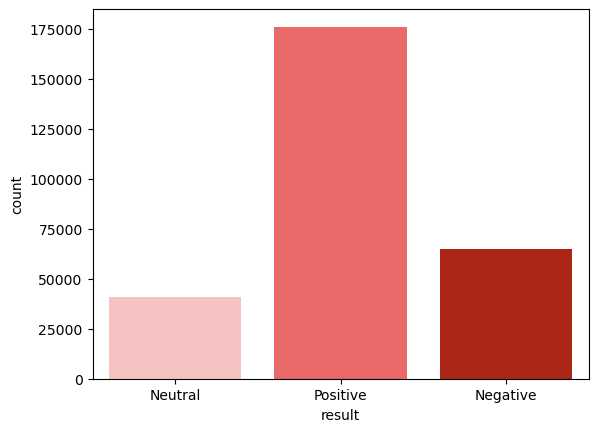

In [10]:
color = ["#ffbaba", "#ff5252", "#C41200"]
sns.countplot(x='result', data=sentiment_target, palette=color)

#### 2.2 Co relations between star rating and sentiment analysis result

In [7]:
# read review_all csv in dataframe to correlate stars with sentiment 
review_all = pd.read_csv('data/review_all.csv')
# correlation matrix between these variables
corr_columns=['stars','positive', 'neutral','negative' ]
corr_mtrx=review_all[corr_columns].corr()
corr_mtrx

,stars,positive,neutral,negative
stars,1.000000,0.433734,-0.005024,-0.46449
positive,0.433734,1.000000,NaN,NaN
neutral,-0.005024,NaN,1.000000,NaN
negative,-0.464490,NaN,NaN,1.00000


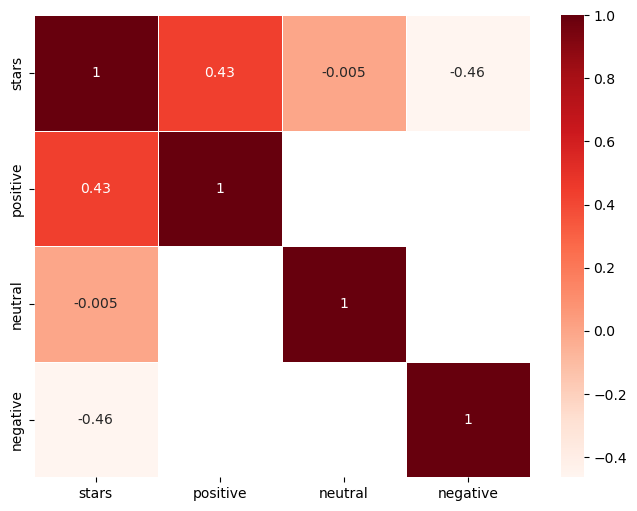

In [8]:
# Draw the heatmap of correlation table with the combination of reds.
plt.figure(figsize = (8,6))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='Reds')

#### 2.3 Details of postive and negative reviews 
Observations: 
In average, a business has 18 negative reviews and 50 positive reviews, positive ones in 3 times more than negatives. 
75% of business have less than 22 negative reviews.

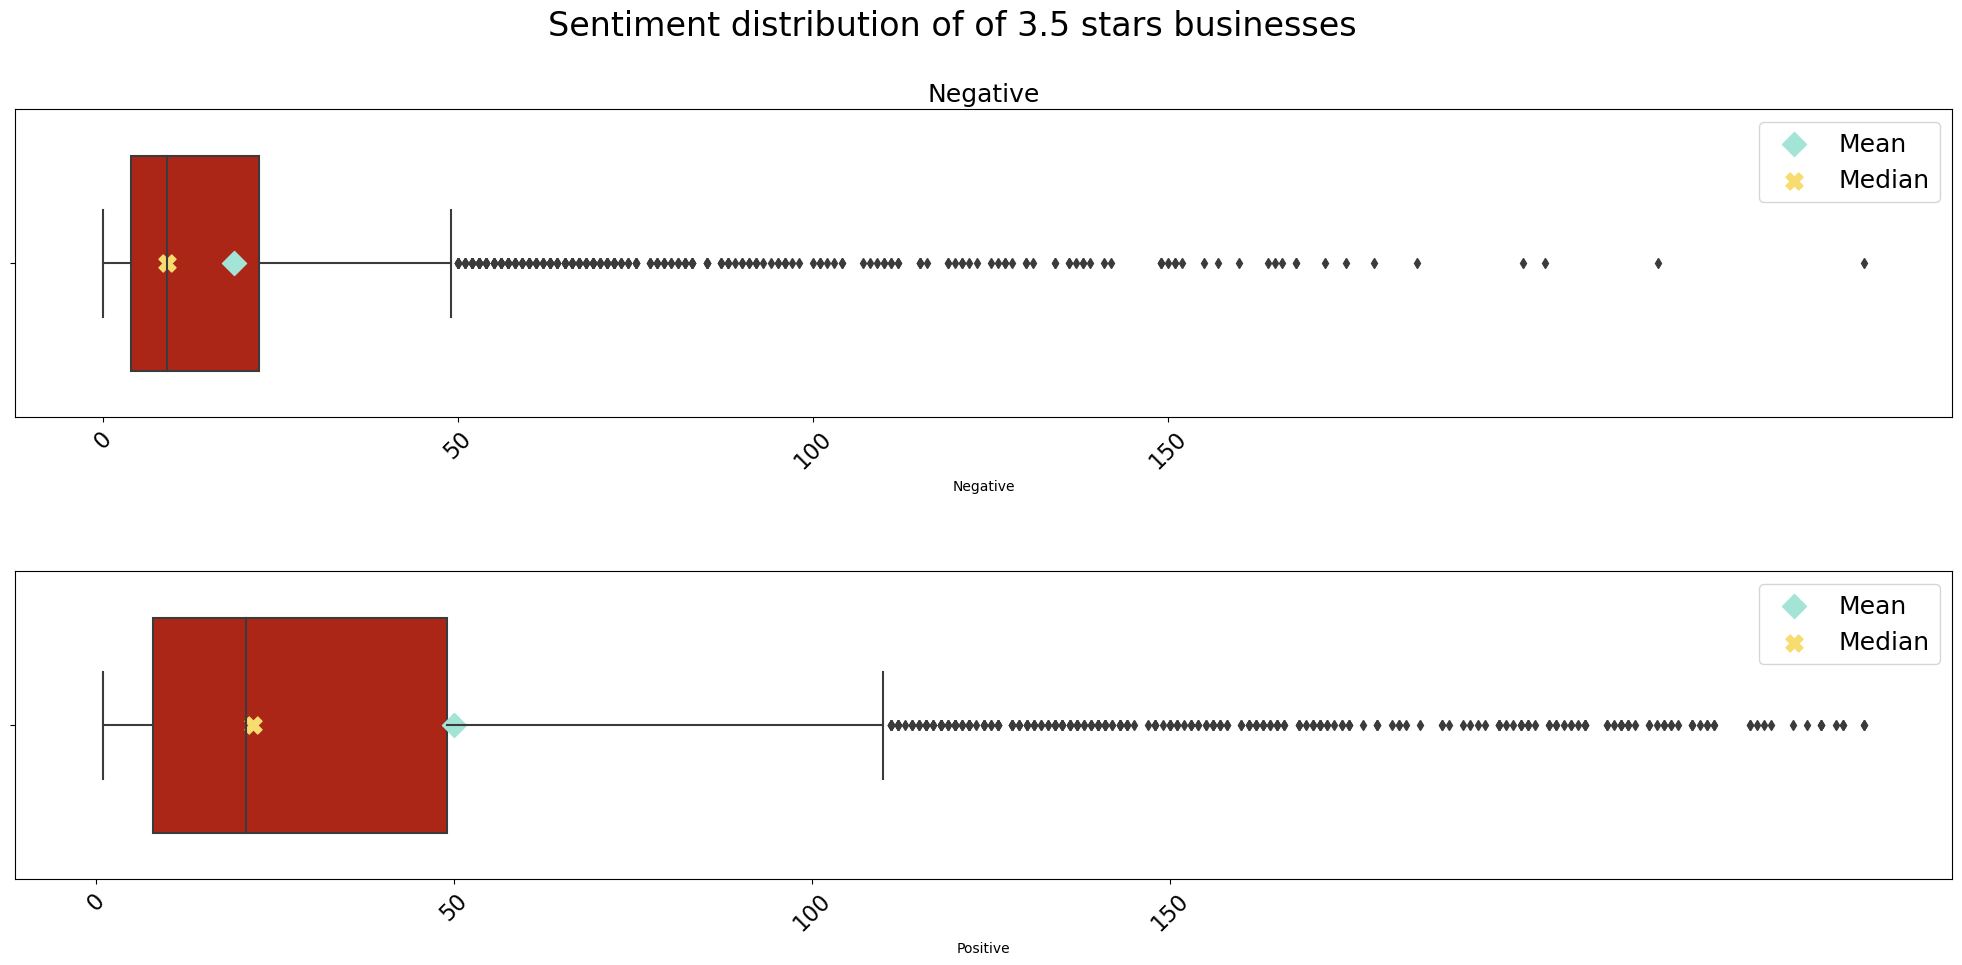

In [11]:
# create a new df to storage sentiment analysis result by each biz
sentiment_counts = sentiment_target.groupby('business_id')['result'].value_counts().unstack(fill_value=0)

# limited the sample group to show in the boxplot, for display reason
sentiment_counts_n = sentiment_counts[sentiment_counts["Negative"] < 250]
sentiment_counts_p = sentiment_counts[sentiment_counts["Positive"] < 250]

plt.figure(figsize=(25, 10))

# set the gap btw 2 plots
plt.subplots_adjust(hspace=0.5)

plt.suptitle('Sentiment distribution of of 3.5 stars businesses', fontsize=24)

# negative subplot
plt.subplot(2, 1, 1)
sns.boxplot(x=sentiment_counts_n['Negative'], color='#c41200', width = 0.7)
# to calculate the mean and medium
means_n = sentiment_counts["Negative"].mean()
medians_n = sentiment_counts["Negative"].median()
# to show the mean and median with different makers in the plot, and defined the size of the makers
plt.scatter(y=[0], x=[means_n], color='#A3E4D7', marker='D', label='Mean', s=150)
plt.scatter(y=[0], x=[medians_n], color='#F7DC6F', marker='X', label='Median', s=150)
# set up the X axis
plt.xticks(np.arange(0, 200, step=50), fontsize = 16, rotation=45)
plt.title('Negative', fontsize = 18)
plt.legend(fontsize = 18)

# positive subplot
plt.subplot(2, 1, 2)
sns.boxplot(x=sentiment_counts_p["Positive"], color='#c41200', width = 0.7)
means_p = sentiment_counts["Positive"].mean()
medians_p = sentiment_counts["Positive"].median()
plt.scatter(y=[0], x=[means_p], color='#A3E4D7', marker='D', label='Mean', s=150)
plt.scatter(y=[0], x=[medians_p], color='#F7DC6F', marker='X', label='Median', s=150)
plt.xticks(np.arange(0, 200, step=50), fontsize = 16, rotation=45)
plt.legend(fontsize = 18)

In [12]:
sentiment_counts.describe()

result,Negative,Neutral,Positive
count,3516.000000,3516.000000,3516.000000
mean,18.460182,11.589022,50.068828
std,27.662287,22.249364,84.957182
min,0.000000,0.000000,1.000000
25%,4.000000,2.000000,9.000000
50%,9.000000,4.000000,22.000000
75%,22.000000,12.000000,54.000000
max,520.000000,438.000000,1785.000000


#### 2.4 Most discussed topic

In [16]:
# Inner join restaurants to review df as review selcted
review_selected = review_all.merge(restaurants[['business_id', 'stars']], how='inner', on='business_id')
# Rename headers to identify specific columns
review_selected.rename(columns={'stars_x': 'review_stars', 'stars_y':'biz_stars'}, inplace=True)
# filter on 3.5 stars restaurants reviews for further analysis
review_selected = review_selected.query('biz_stars == 3.5')
# Print the review selected data
print(f"# Restaurants with 3.5 stars : {review_selected['business_id'].nunique()}, # Reviews : {review_selected['review_id'].nunique()}")
review_selected.head()

# Restaurants with 3.5 stars : 3516, # Reviews : 281695


,business_id,review_id,text,positive,neutral,negative,user_id,review_stars,useful,funny,cool,date,biz_stars
425,VHA-b1NH4tIZB_IVEf_pmA,sSQKHpFs8tSXl4Lv34zQgQ,I have to say that Minado is a above the avera...,NaN,0.793211,NaN,kZOHcAsSBIAoXn7cYbvveA,3,0,0,0,2016-11-20,3.5
426,VHA-b1NH4tIZB_IVEf_pmA,I0zFafpznahATV0kqwLktw,My family had been coming here for many years ...,NaN,NaN,0.978465,kwYkRg8RhYXFc4OnqqWKPw,2,1,0,0,2017-07-07,3.5
427,VHA-b1NH4tIZB_IVEf_pmA,WmEIgQT7n7S-apOuT2D1Ag,"I know what you are thinking, 5 stars for a su...",NaN,0.706768,NaN,ztW1RcXsT-bQS5cgeMzgzg,5,8,3,1,2011-03-13,3.5
428,VHA-b1NH4tIZB_IVEf_pmA,oybk1tECjSekgBtaMxL0rg,Pretty disappointing - this place use to have ...,NaN,NaN,0.954907,rjDuYaK41di3_CKioCHXLA,2,1,0,0,2018-03-31,3.5
429,VHA-b1NH4tIZB_IVEf_pmA,KV_HOy8-Qt3AB4WYsfPvvA,This place is expensive and has soggy food. Th...,NaN,NaN,0.984502,mbQ-dSss7cu0i68iUzN3fg,1,0,0,0,2019-02-02,3.5


<Axes: title={'center': 'FOOD'}, xlabel='Sentiment score (0 to 1)'>

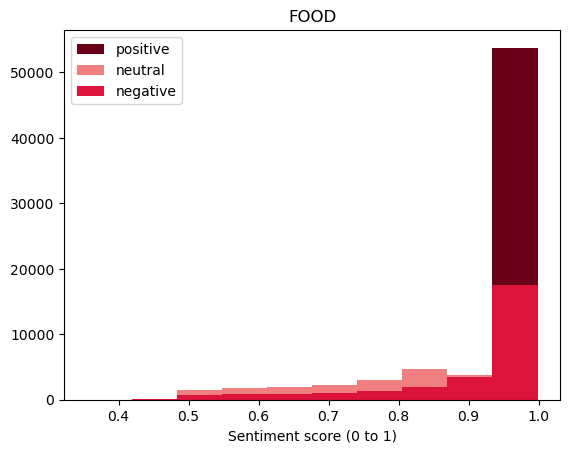

In [18]:
# import cycle and islice to plot custom colors.
from itertools import cycle, islice
# lookup words frequency from the dataframe
word = 'food'
# define color patterns
my_colors = list(islice(cycle(['xkcd:claret', 'lightcoral', 'crimson']), None, len(review_selected)))
# plot sentiment score on stack from 3 different polarity label.
review_selected.loc[review_selected['text'].apply(lambda x: word in x.lower().split()),               
           ['positive', 'neutral','negative']].plot(kind='hist', title=word.upper(), xlabel='Sentiment score (0 to 1)', ylabel="", color=my_colors, bins=10, grid=False) # removing grid